# Python pour le Machine Learning : Pandas / Time Series


## 1. Intro

Nous avons ici l'une des techniques de trading les plus populaires. 

![Python_Pandas_Fig](./images/Python_Pandas_Fig_000016.png)

Pourtant, je vais vous expliquer pourquoi vous ne devez jamais l'utiliser sur du Bitcoin, au risque de perdre tout votre argent.Nous allons voir comment utiliser $Pandas$ pour travailler sur des problèmes de $time\ series$. Cela va typiquement inclure l'étude du climat, l'analyse de la bourse ou tout autre phénomène qui évolue avec le temps. 

En réalité, Pandas a même été spécifiquement développé pour aborder ce type de problème, donc nous y trouverons une multitude de fonctionnalités pour travailler sur des time series.

## 2. DateTimeIndex

Pour commencer, nous allons nous rendre sur le site Yahoo Finance pour télécharger des données sur le Bitcoin. 

Pour ce faire, c'est très simple : il suffit de rechercher "BTC-EUR", puis dans l'historique, tout ce que nous avons à faire est de cliquer sur "Maximum". Ainsi, nous obtenons la date la plus ancienne, et nous cliquons ensuite ici pour télécharger nos données : BTC-EUR.csv

Comme vous le savez, nous importons Pandas, puis nous créons un DataFrame "bitcoin". Nous utilisons la fonction $read\_csv$ car cette fois-ci, nous disposons d'un fichier CSV. 

Nous utilisons ensuite la fonction $head$ pour observer le début de notre DataFrame. 

Si nous souhaitons observer l'évolution d'une des valeurs, comme la valeur "Close", nous utiliserons la fonction $plot$. Nos données sont alors chargées. Cependant, il est regrettable que sur ce graphique, nous ne trouvions pas de date en abscisse. Nous aimerions voir, par exemple, 2017, 2018, 2019.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
bitcoin = pd.read_csv('datasets/BTC-EUR.csv')
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-30,296.389008,309.562134,294.327698,306.417480,306.417480,27484400
1,2014-10-01,306.799957,310.224304,301.894867,303.949768,303.949768,20782347
2,2014-10-02,304.245300,304.692535,294.376831,296.054932,296.054932,17189755
3,2014-10-03,296.140961,299.354065,285.944061,287.264862,287.264862,24691330
4,2014-10-04,287.568512,291.240112,260.396301,262.777466,262.777466,37743907


<Axes: >

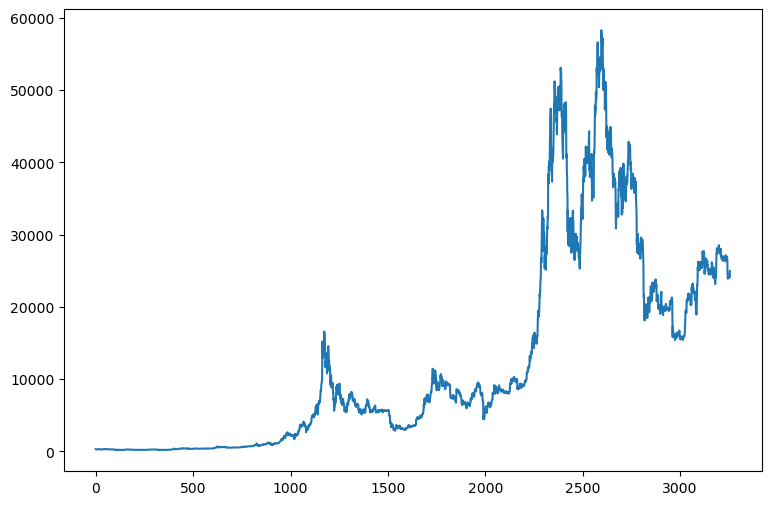

In [3]:
bitcoin['Close'].plot(figsize=(9, 6))

Ne vous inquiétez pas, c'est normal. Pour l'instant, nous n'avons pas indiqué à Pandas que nous voulions travailler sur une base temporelle. Donc, dans notre DataFrame "bitcoin", nous avons un index par défaut (0,1,2,3) que nous retrouvons à la fois dans notre DataFrame (dans la colonne tout à gauche) et sur notre graphique Matplotlib. 

In [4]:
bitcoin.index

RangeIndex(start=0, stop=3257, step=1)

Pour changer cela et débloquer les fonctionnalités de time series, nous devons définir un nouveau type d'index : le DateTimeIndex. Pour ce faire, nous écrivons deux choses dans notre fonction $read\_csv$. 

Pour commencer, nous indiquons que la colonne d'index doit être celle qui contient nos différentes dates. Ce changement est visible dans notre DataFrame et sur notre graphique, car nous voyons maintenant nos différentes dates. 

Mais ce n'est pas encore fini, car il faut désormais indiquer à Pandas que cette colonne d'index doit être interprétée comme une date. Pour cela, nous écrivons dans notre fonction read_csv : $parse\_dates=True$.
![Python_Pandas_Fig](./images/Python_Pandas_Fig_000017.png)

Maintenant, si nous exécutons tout notre code, nous obtenons un index de type DateTimeIndex.

<Axes: xlabel='Date'>

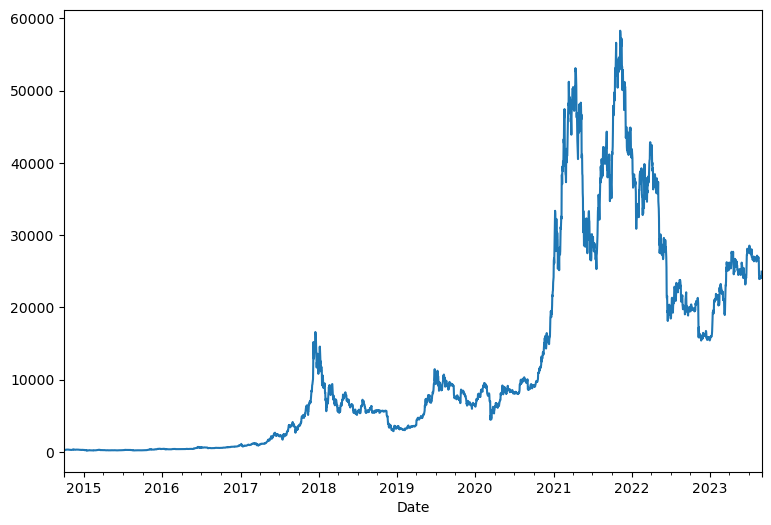

In [5]:
bitcoin = pd.read_csv('datasets/BTC-EUR.csv', index_col='Date', parse_dates=True)
bitcoin.head()

bitcoin['Close'].plot(figsize=(9, 6))

Nous sommes prêts à commencer notre analyse de time series. Avec ce nouvel index, nous pourrons réaliser toutes les opérations que vous pourriez imaginer avec des dates et le temps, car Pandas comprend les notions de jours, semaines, mois et années. 
![Python_Pandas_Fig](./images/Python_Pandas_Fig_000018.png)

Par exemple, pour observer l'évolution du Bitcoin uniquement en 2019, nous écrivons $bitcoin['2019']$ pour la colonne "Close" et nous l'affichons avec Matplotlib. Cela nous donne l'évolution du Bitcoin en 2019. 

<Axes: xlabel='Date'>

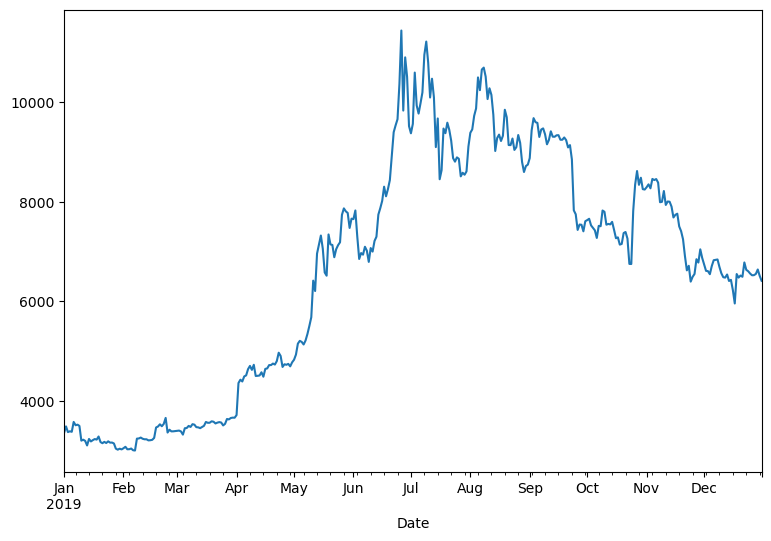

In [6]:
bitcoin.loc['2019']['Close'].plot(figsize=(9, 6))

Si nous voulons voir l'évolution du Bitcoin en septembre 2019, nous écrivons $bitcoin['2019-09']$. Nous observons que le Bitcoin a subi une chute importante ce mois-là. Comme mentionné précédemment, nous pouvons aussi faire du slicing sur des dates. 

Par exemple, pour voir l'évolution du Bitcoin entre 2017 et 2019, nous écrivons $bitcoin['2017':'2019']$.

<Axes: xlabel='Date'>

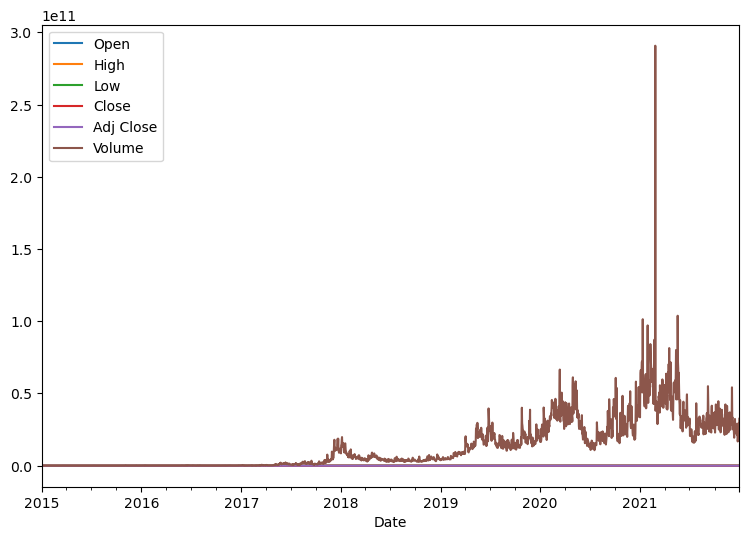

In [7]:
bitcoin.loc['2015':'2021'].plot(figsize=(9, 6))

De plus, cela fonctionne également avec la méthode $lo$c. Donc si vous préférez utiliser cette méthode, c'est à votre choix, vous obtiendrez le même résultat. 

Si vous avez des fichiers avec des dates formatées différemment, ne vous inquiétez pas, car Pandas s'adapte à de nombreux formats. 

Vous pouvez utiliser des tirets, des slashes, des points, des virgules, des espaces, etc. Si Pandas ne parvient pas à convertir une date, vous pouvez effectuer la conversion vous-même avec la fonction $to\_datetime$.
![Python_Pandas_Fig](./images/Python_Pandas_Fig_000019.png)

Enfin, une dernière chose à propos de cet index DateTime est que nous pouvons non seulement y inclure des dates (année, mois, jour), mais aussi des heures, minutes, secondes et même millisecondes. 
![Python_Pandas_Fig](./images/Python_Pandas_Fig_000020.png)

Ainsi, vous pourriez avoir un dataset avec des températures pour chaque minute de la journée et analyser ce dataset sans problème. 

Vous pourriez même avoir une machine qui collecte des données toutes les millisecondes et analyser ces données avec les mêmes fonctions que nous verrons dans la suite de cette vidéo.

## 3. Pandas resample() et agg()

Je vais vous présenter la première fonction qui est très utile : c'est la fonction $resample$. 
![Python_Pandas_Fig](./images/Python_Pandas_Fig_000022.png)

Cette fonction permet de regrouper nos données selon une fréquence temporelle. Par exemple, pour l'année 2019, voici ce que l'on obtient lorsque l'on regroupe nos données par mois.

Date
2019-01-31    Axes(0.125,0.11;0.775x0.77)
2019-02-28    Axes(0.125,0.11;0.775x0.77)
2019-03-31    Axes(0.125,0.11;0.775x0.77)
2019-04-30    Axes(0.125,0.11;0.775x0.77)
2019-05-31    Axes(0.125,0.11;0.775x0.77)
2019-06-30    Axes(0.125,0.11;0.775x0.77)
2019-07-31    Axes(0.125,0.11;0.775x0.77)
2019-08-31    Axes(0.125,0.11;0.775x0.77)
2019-09-30    Axes(0.125,0.11;0.775x0.77)
2019-10-31    Axes(0.125,0.11;0.775x0.77)
2019-11-30    Axes(0.125,0.11;0.775x0.77)
2019-12-31    Axes(0.125,0.11;0.775x0.77)
Freq: M, Name: Close, dtype: object

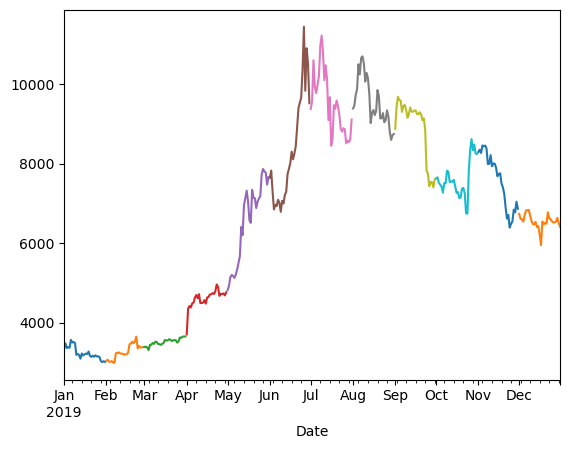

In [8]:
bitcoin.loc['2019','Close'].resample('M').plot()

On observe différents paquets de données : on a des données pour janvier, pour février, pour mars, etc. 

Et qui dit groupe de données, dit statistique. On pourrait chercher la moyenne pour chaque mois ou bien l'écart type pour chaque mois. Vous avez saisi l'idée.

Si on choisit la moyenne, on obtiendra le graphique suivant. 

<Axes: xlabel='Date'>

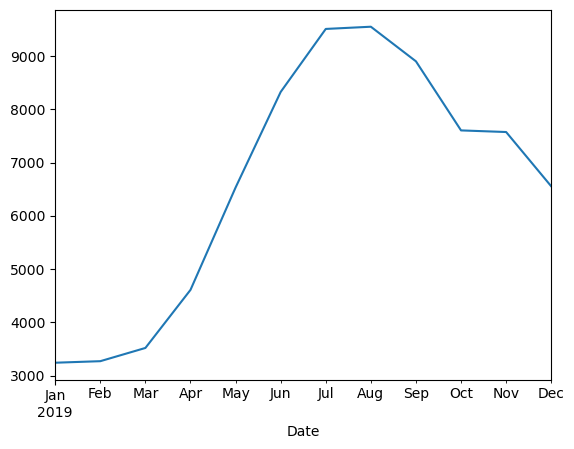

In [9]:
bitcoin.loc['2019','Close'].resample('M').mean().plot()

Voici donc l'évolution du bitcoin en 2019 en faisant la moyenne sur chaque mois. C'est simple à comprendre et on peut faire la même chose en suivant les semaines en utilisant W (pour week) ou bien on peut le faire toutes les deux semaines en écrivant "2W". On obtient ainsi la moyenne du bitcoin toutes les deux semaines.

<Axes: xlabel='Date'>

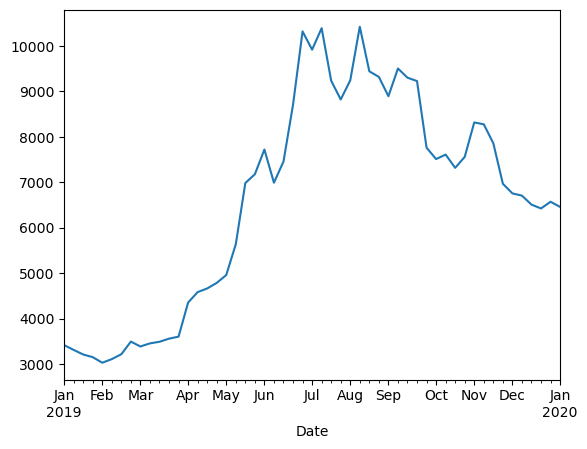

In [10]:
bitcoin.loc['2019','Close'].resample('W').mean().plot()

<Axes: xlabel='Date'>

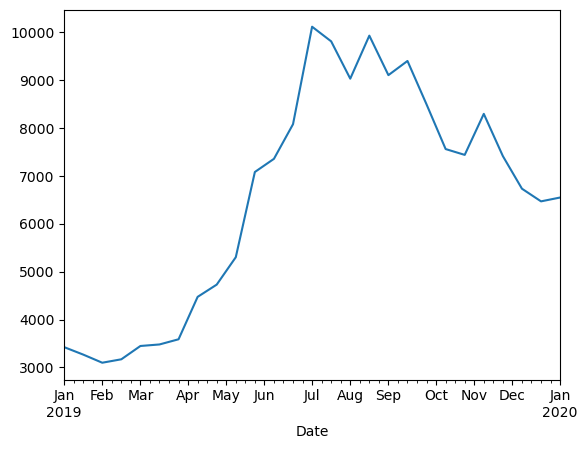

In [11]:
bitcoin.loc['2019','Close'].resample('2W').mean().plot()

Juste avant, j'ai parlé de l'écart type. Il serait intéressant de voir à quel point le bitcoin était volatile en 2019. On pourrait écrire std et observer les résultats. 

<Axes: xlabel='Date'>

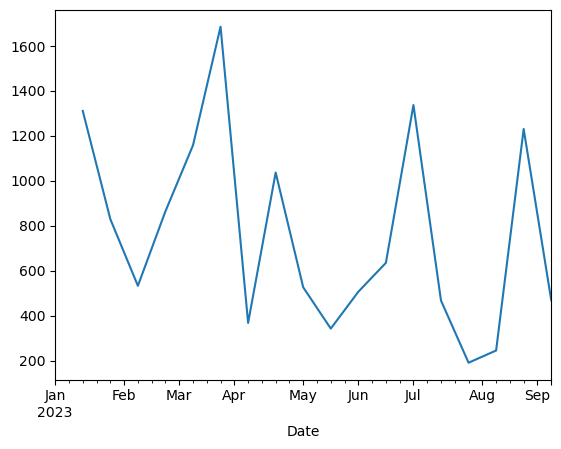

In [12]:
bitcoin.loc['2023','Close'].resample('2W').std().plot()

On voit que le bitcoin est très volatile en ce moment, alors qu'il était plutôt stable en début d'année. Avec la fonction resample, on obtient des résultats intéressants.

Dans la pratique, on aime bien afficher toutes ces courbes sur un seul et même graphique. 

Ça peut sembler impressionnant, mais en réalité, c'est simple. On affiche nos données brutes, puis on affiche la moyenne de chaque mois. 

Avec quelques options matplotlib, on peut créer un style agréable.

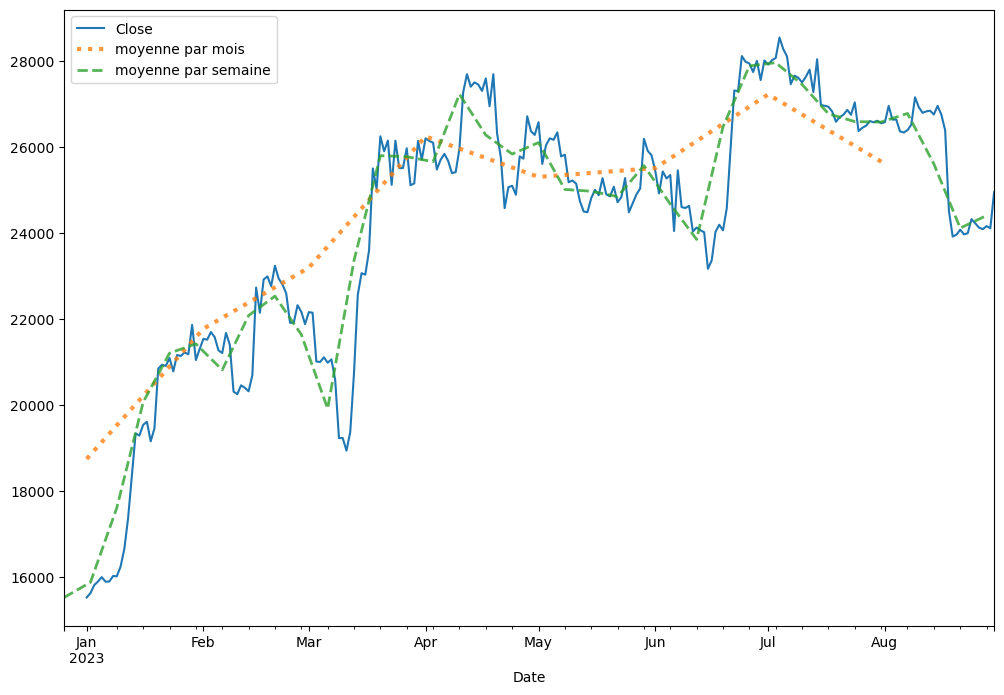

In [13]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2023', 'Close'].plot()
bitcoin.loc['2023', 'Close'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2023', 'Close'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

À présent, une fonction qu'on utilise très souvent en complément de la fonction $resample$ est la fonction $aggregate$ (ou $agg$). 
![Python_Pandas_Fig](./images/Python_Pandas_Fig_000024.png)

Cette fonction nous permet de rassembler, dans un seul tableau, plusieurs statistiques que l'on aimerait appliquer après avoir utilisé $resample$. 

Par exemple, on reprend notre échantillonnage pour les semaines, puis on écrit $agg$, entre crochets, on indique les différentes statistiques que l'on veut, comme la moyenne, l'écart type, le minimum et le maximum. 

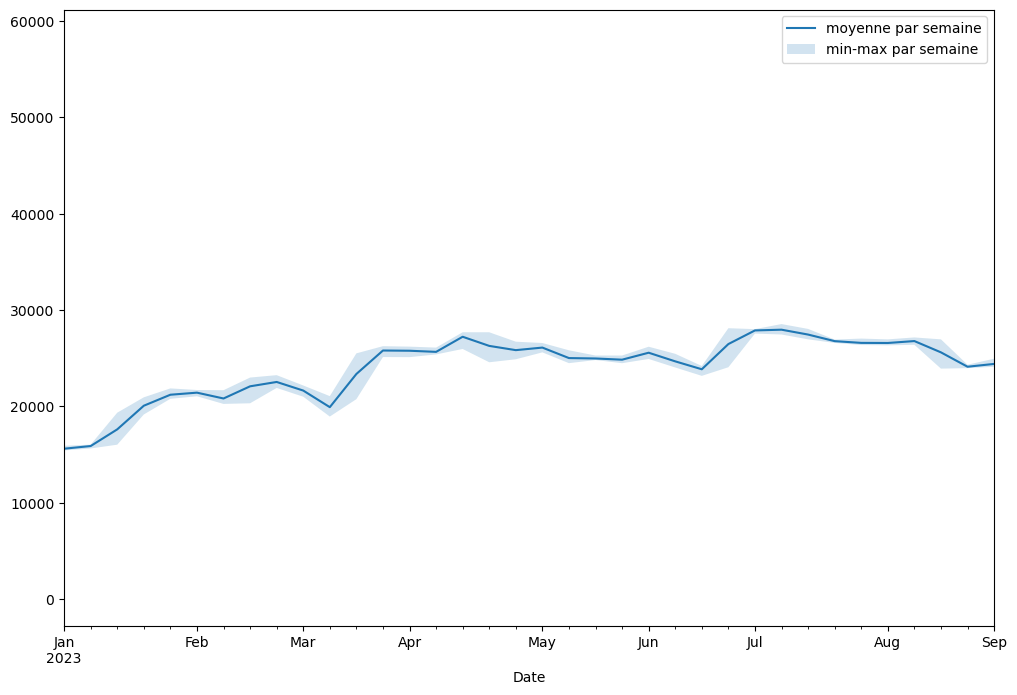

In [14]:
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(12, 8))
m['mean']['2023'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')

plt.legend()
plt.show()

Cela nous donne un tableau contenant nos différentes statistiques. 

Encore une fois, avec un peu de manipulation sur matplotlib, on peut créer des graphiques très intéressants.

J'ai enregistré mon tableau aggregate dans une variable $m$. 

Ensuite, je crée un graphique où j'affiche la moyenne de ce tableau pour chaque semaine. J'utilise également la fonction $fill\_between$ de $matplotlib$ pour créer une zone d'incertitude entre le maximum et le minimum pour chaque semaine. C'est vraiment aussi simple que ça. Je pense que vous avez compris la puissance de cette fonction $resample$ ; elle est extrêmement pratique.

Maintenant, nous allons voir comment calculer des moyennes mobiles ($moving\ averages$) avec pandas. 

Si vous ne savez pas ce qu'est une moyenne mobile, c'est une technique qui permet de calculer une moyenne sur une fenêtre glissante de valeurs. Plutôt que de faire la moyenne de toutes les valeurs, comme celles que nous aurions pour 2019 par exemple, nous ferons la moyenne sur une fenêtre définie de valeurs.

## 4. Pandas rolling(): Moyenne mobile, pandas ewm() : Exponential weigthed function

On définit une fenêtre, par exemple de sept jours. 
![Python_Pandas_Fig](./images/Python_Pandas_Fig_000025.png)

On calcule la moyenne, puis on se décale d'un jour dans cette fenêtre et on recalcule la moyenne, et ainsi de suite. 
![Python_Pandas_Fig](./images/Python_Pandas_Fig_000026.png)
![Python_Pandas_Fig](./images/Python_Pandas_Fig_000027.png)
![Python_Pandas_Fig](./images/Python_Pandas_Fig_000028.png)

Donc, en fait, on utilise une fonction qui permet d'effectuer un roulement. Dans pandas, on appelle cette fonction $rolling$. À l'intérieur de cette fonction qui effectue le roulement, on définira une taille pour notre fenêtre. Par exemple, on écrit $rolling$ et à l'intérieur, on spécifie $window = 7$. Cela nous donne une fonction de roulement. 

In [15]:
bitcoin.loc['2023','Close'].rolling(window=7)

Rolling [window=7,center=False,axis=0,method=single]

Mais ce que nous voulons, c'est utiliser cette fonction pour calculer une moyenne, ou peut-être une variance, ou même un écart type. 

Il y a tellement de possibilités. Donc, par exemple, on va calculer la moyenne, et on va l'afficher avec matplotlib, obtenant ainsi un certain résultat. 


<Axes: xlabel='Date'>

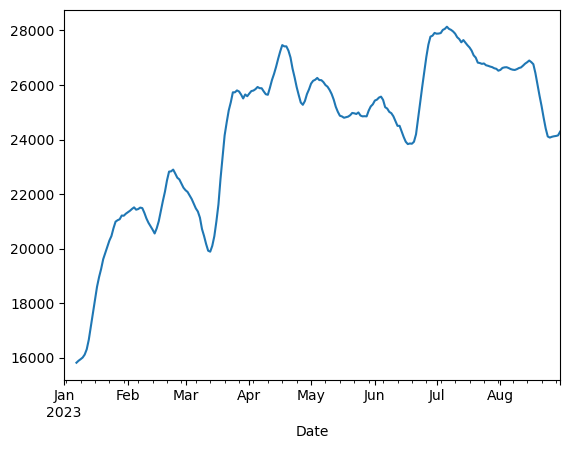

In [16]:
bitcoin.loc['2023','Close'].rolling(window=7).mean().plot()

En superposant cela sur notre signal original, on obtient le graphique suivant. 

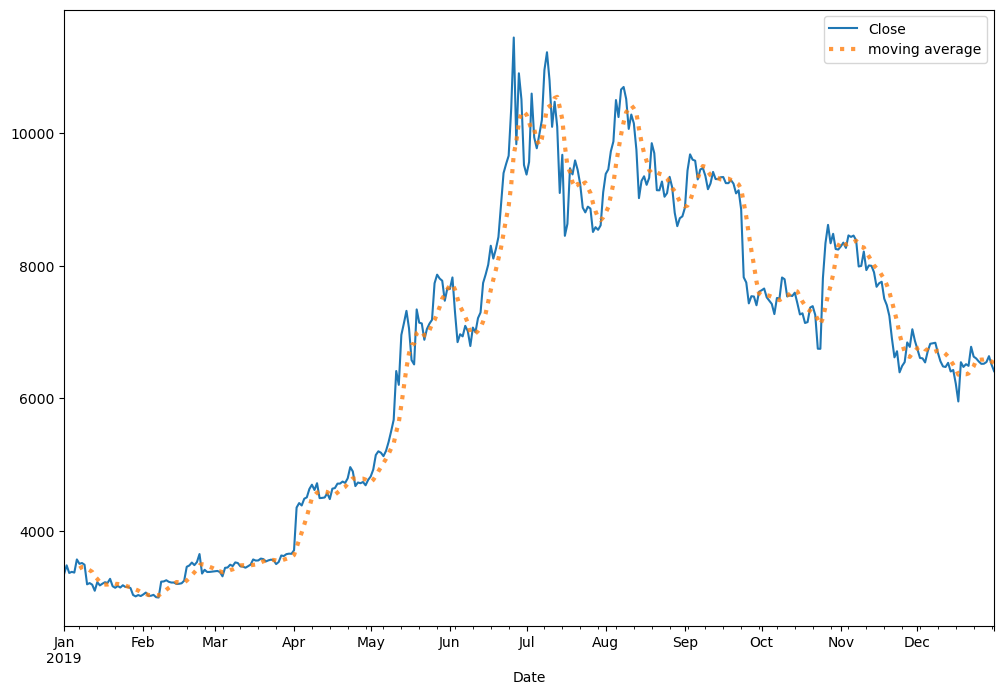

In [17]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].rolling(window=7).mean().plot(label='moving average', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

Si vous regardez ce graphique de plus près, par exemple pour le mois de septembre. 

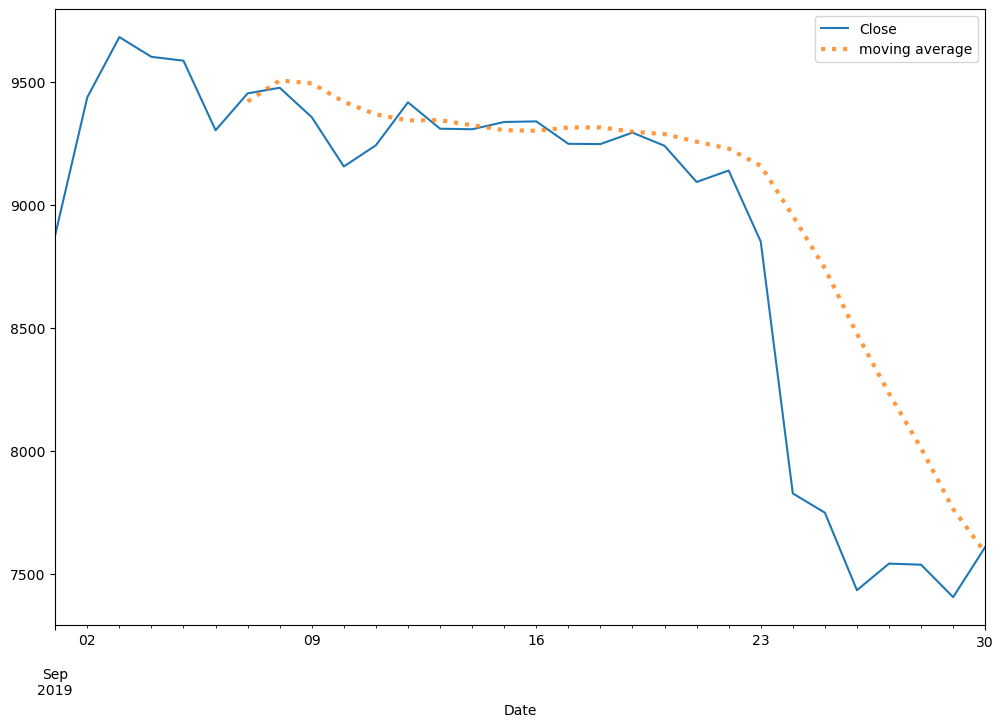

In [18]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='moving average', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

Vous remarquerez quelque chose d'ennuyeux. Notre moyenne mobile ne commence pas dès le début de notre signal. C'est simplement parce que nous avons pris une fenêtre de sept jours, regardé tous les nombres, et finalement placé la moyenne à la fin. 

Mais ce que l'on pourrait faire est de placer cette moyenne au centre de cette fenêtre en écrivant center=True. 
![Python_Pandas_Fig](./images/Python_Pandas_Fig_000029.png)

Cela ne change pas le calcul de la moyenne, mais redécale toutes les valeurs au centre de leur fenêtre, comme vous pouvez le voir. 

Pour comparer les deux méthodes, il suffirait de copier-coller cette ligne et, dans la seconde ligne, écrire $center=True$. 

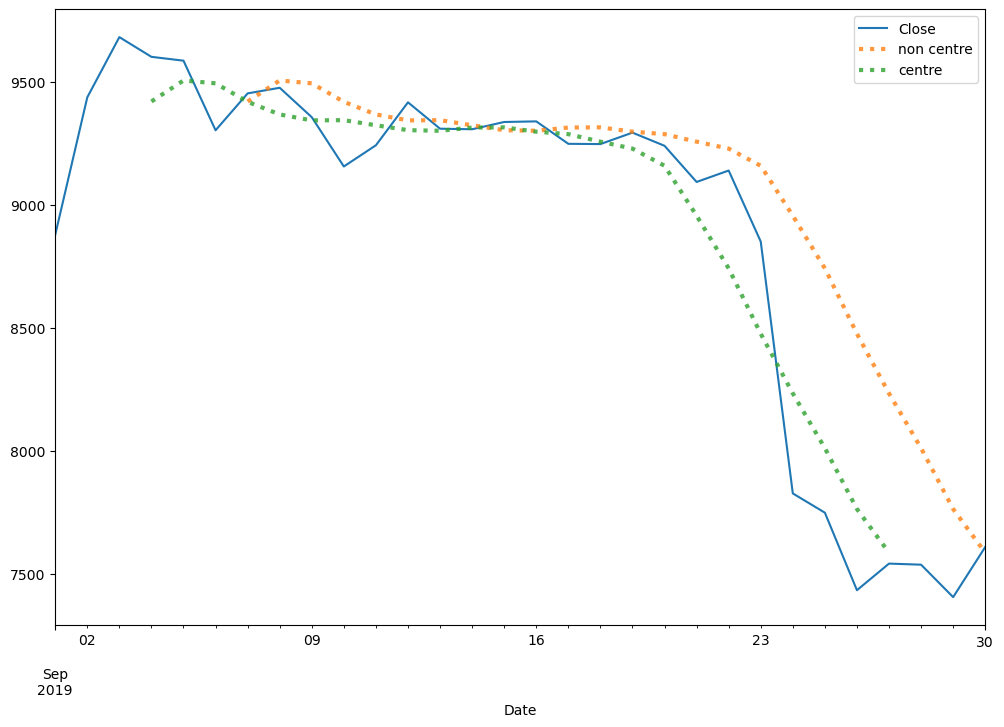

In [19]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='centre', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

Le résultat serait légèrement différent, et peut-être préférable. 

Mais on pourrait se dire que la moyenne mobile n'est peut-être pas la meilleure technique pour cette manipulation. Et vous auriez raison. Il y a une autre technique, un peu plus adaptée, appelée moyenne mobile exponentielle en français. 
![Python_Pandas_Fig](./images/Python_Pandas_Fig_000030.png)


Elle est définie par la formule suivante où ${x}_t$ est la valeur de $x$ à un instant $t$, c'est-à-dire la valeur à une date précise, et α est un facteur de lissage.

Grâce à cette formule, les valeurs perdent progressivement du poids avec le temps. C'est précisément notre facteur de lissage, $\alpha$, qui est compris entre 0 et 1, qui permet de définir la façon dont les valeurs vont perdre de leur importance avec le temps. 

Cette formule peut aussi être exprimée de cette manière, ce qui met en relief la fonction $ewm$ que l'on trouve dans pandas. 
![Python_Pandas_Fig](./images/Python_Pandas_Fig_000032.png)

Dans cette fonction, tout ce que nous avons à faire est de définir une valeur pour notre paramètre alpha. 
![Python_Pandas_Fig](./images/Python_Pandas_Fig_000033.png)

Cependant, il n'y a ni paramètre window ni paramètre center dans cette fonction. Tout ce que l'on spécifie, c'est alpha. Nous pourrions essayer un paramètre alpha égal à, disons, 0,6 pour commencer.

 Ainsi, en affichant le tout, on obtient le graphique suivant, dans lequel on observe que $ewm$ suit un peu mieux la tendance du Bitcoin que nos moyennes mobiles précédentes.

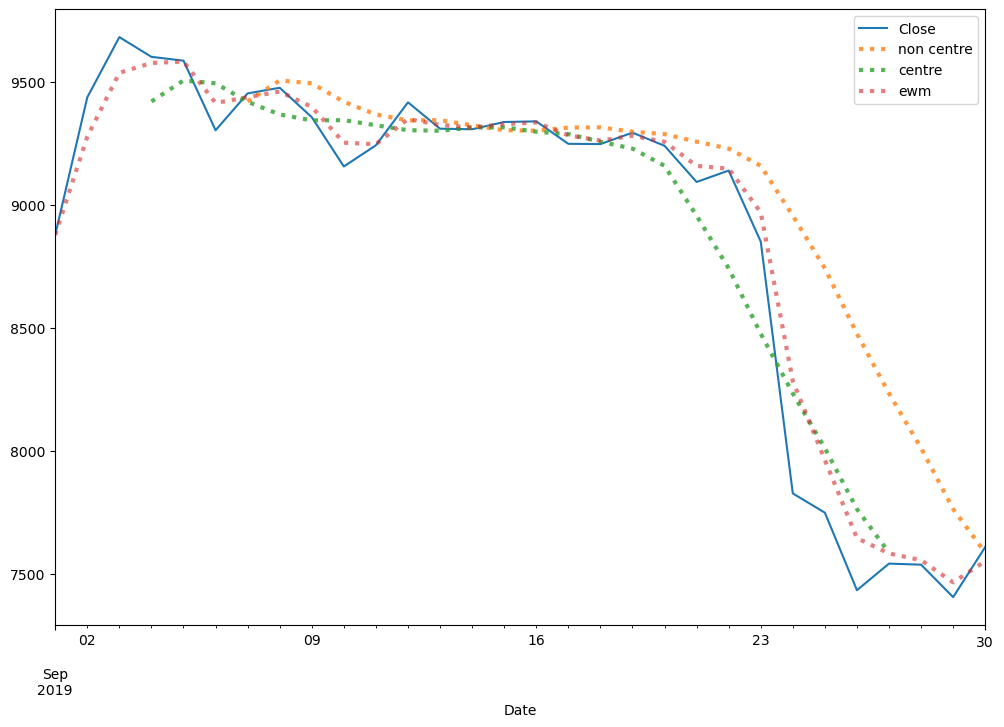

In [20]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='centre', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].ewm(alpha=0.6).mean().plot(label='ewm', lw=3, ls=':', alpha=0.6)
plt.legend()
plt.show()  

Maintenant, en utilisant une simple boucle $for$, nous pouvons facilement comparer différentes valeurs de $\alpha$ pour voir ce que cela donne pour notre fonction exponentielle. 

En l'occurrence, tout ce que j'ai eu à faire, c'est de créer un tableau $numpy$ avec la fonction $arange$ et d'itérer à travers ce tableau pour des valeurs entre 0,2 et 1, d'intégrer ces différentes valeurs dans ma fonction $ewm$ et, accessoirement, d'ajouter une légende avec la fonction $format$ qui me permet d'inclure ma valeur d' $\alpha$ dans cette légende.

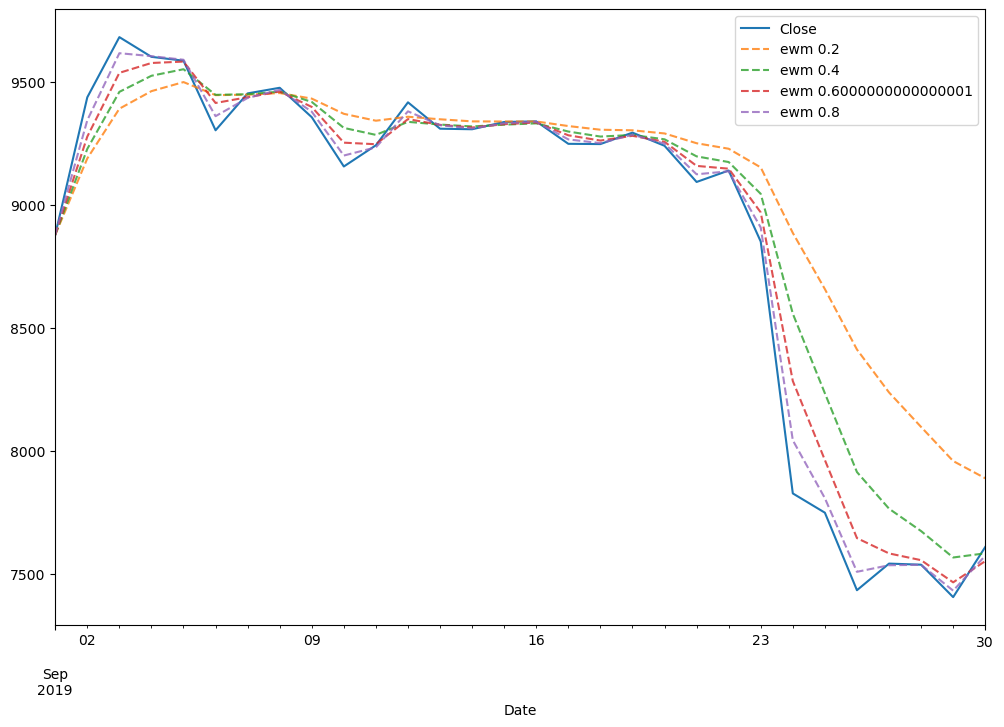

In [21]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2019-09', 'Close'].ewm(alpha=i).mean().plot(label=f'ewm {i}', ls='--', alpha=0.8)
plt.legend()
plt.show()

Voilà, nous avons passé en revue les fonctions les plus utiles pour travailler avec des séries temporelles. À présent, je vais vous montrer comment comparer deux séries en les assemblant ensemble. 

Dans ce contexte, nous allons essayer de comparer le Bitcoin avec une autre crypto-monnaie très connue, l'Ethereum.

## 5. Pandas merge() : inner, outer, etc…

Donc, nous revoilà sur Yahoo Finance. Cette fois-ci, nous allons rechercher les données pour Ethereum. 

Cependant, il y a un petit souci : contrairement à Bitcoin, les données historiques d'Ethereum ne commencent qu'en 2015, car Ethereum est plus récent que Bitcoin. 

Lorsque nous voudrons fusionner ces deux ensembles de données, cela pourrait poser problème. Typiquement, quand on a deux tableaux numériques de dimensions différentes et qu'on utilise la méthode $concat$ dessus, cela n'est pas possible. 
![Python_Pandas_Fig](./images/Python_Pandas_Fig_000034.png)


Mais avec Pandas, il n'y a aucun problème. On peut assembler des dataframes et des séries avec plusieurs méthodes, notamment $inner$ et $outer$, qui ressemblent aux méthodes SQL.
![Python_Pandas_Fig](./images/Python_Pandas_Fig_000035.png)

Ne vous inquiétez pas, nous allons voir cela en détail. Mais pour l'instant, téléchargeons nos données. 

Nous allons les importer dans Pandas comme auparavant, en écrivant $index\_col=date$ et $parse\_dates=True$. 

Cette fois-ci, j'ai créé un dataframe Ethereum. En regardant son évolution en 2019, on observe une tendance similaire à celle du Bitcoin.

<Axes: xlabel='Date'>

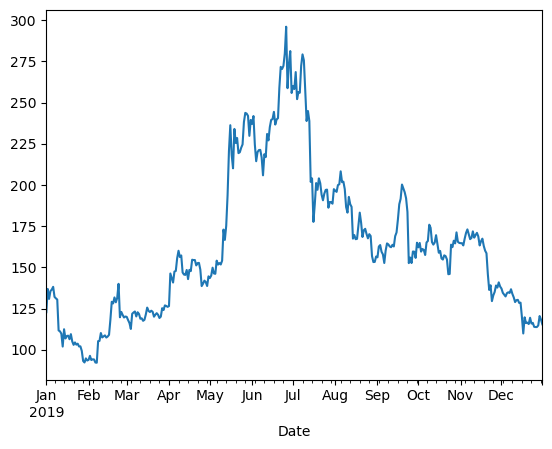

In [22]:
ethereum = pd.read_csv('datasets/ETH-EUR.csv', index_col='Date', parse_dates=True)
ethereum.loc['2019']['Close'].plot()

Pour fusionner ces deux dataframes, nous allons utiliser $pd.merge()$. Nous passerons nos dataframes Bitcoin et Ethereum en arguments, définirons une colonne commune (dans ce cas, "date") pour effectuer la fusion, et enfin choisirons la méthode de fusion. 

Il existe plusieurs méthodes : $inner$, $outer$, $left$, $right$, etc. 
![Python_Pandas_Fig](./images/Python_Pandas_Fig_000036.png)

Si nous utilisons $inner$, nous obtenons un dataframe où les colonnes "open" du Bitcoin et d'Ethereum sont respectivement nommées $Open\_x$ et $Open\_y$. 

Pour rendre ces noms plus clairs, nous pouvons utiliser l'argument suffixes, comme $suffixes=('\_btc', '\_eth')$.

In [23]:
pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc','_eth'))

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2017-11-30,8358.750000,9118.615234,7735.415039,8601.109375,8601.109375,6984946875,363.833099,392.427094,338.259155,375.789215,375.789215,1599462094
2017-12-01,8571.692383,9279.042969,8138.558105,9231.726563,9231.726563,5705374608,374.188110,397.517883,359.442780,392.413147,392.413147,1049608828
2017-12-02,9233.998047,9521.575195,9172.427734,9314.997070,9314.997070,4322062491,392.674744,400.571136,384.097076,389.813263,389.813263,793716868
2017-12-03,9321.810547,10004.808594,9154.656250,9550.607422,9550.607422,5573810526,390.028595,407.334839,380.827637,392.925934,392.925934,835490040
2017-12-04,9544.028320,9823.207031,9341.481445,9823.207031,9823.207031,5167615957,393.095459,400.385406,382.154785,396.228210,396.228210,847349807
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-26,24228.587891,24234.349609,23941.740234,24129.414063,24129.414063,11492414331,1537.474609,1543.697021,1515.694336,1531.206421,1531.206421,4999541315
2023-08-27,24129.011719,24184.732422,24070.322266,24093.095703,24093.095703,5590389230,1531.198975,1532.913330,1522.663086,1525.066162,1525.066162,2244790090
2023-08-28,24092.890625,24238.449219,24052.923828,24163.882813,24163.882813,6403428781,1525.033936,1537.072021,1524.691895,1535.163696,1535.163696,2430369670


Avec la méthode $inner$, nous constatons que nos données commencent en 2017. Cela signifie que nous avons écarté toutes les données de Bitcoin datant d'avant 2017. 

Si, par contre, nous utilisons $outer$, alors le dataframe résultant contiendra toutes les données, y compris celles du Bitcoin à partir de 2014. Bien sûr, pour les lignes correspondant à des dates avant 2017, il n'y aura pas de données pour Ethereum.

In [24]:
pd.merge(bitcoin, ethereum, on='Date', how='outer', suffixes=('_btc','_eth'))

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2014-09-30,296.389008,309.562134,294.327698,306.417480,306.417480,27484400,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-01,306.799957,310.224304,301.894867,303.949768,303.949768,20782347,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-02,304.245300,304.692535,294.376831,296.054932,296.054932,17189755,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-03,296.140961,299.354065,285.944061,287.264862,287.264862,24691330,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-04,287.568512,291.240112,260.396301,262.777466,262.777466,37743907,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-26,24228.587891,24234.349609,23941.740234,24129.414063,24129.414063,11492414331,1537.474609,1543.697021,1515.694336,1531.206421,1531.206421,4.999541e+09
2023-08-27,24129.011719,24184.732422,24070.322266,24093.095703,24093.095703,5590389230,1531.198975,1532.913330,1522.663086,1525.066162,1525.066162,2.244790e+09
2023-08-28,24092.890625,24238.449219,24052.923828,24163.882813,24163.882813,6403428781,1525.033936,1537.072021,1524.691895,1535.163696,1535.163696,2.430370e+09


Le choix entre $inner$, $outer$, $left$, ou $right$ dépend des besoins spécifiques. Ici, nous allons retourner à la méthode $inner$ car elle est plus pratique pour notre analyse. Nommons ce nouveau dataframe btc_eth.

In [25]:
btc_eth = pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))

<Axes: xlabel='Date'>

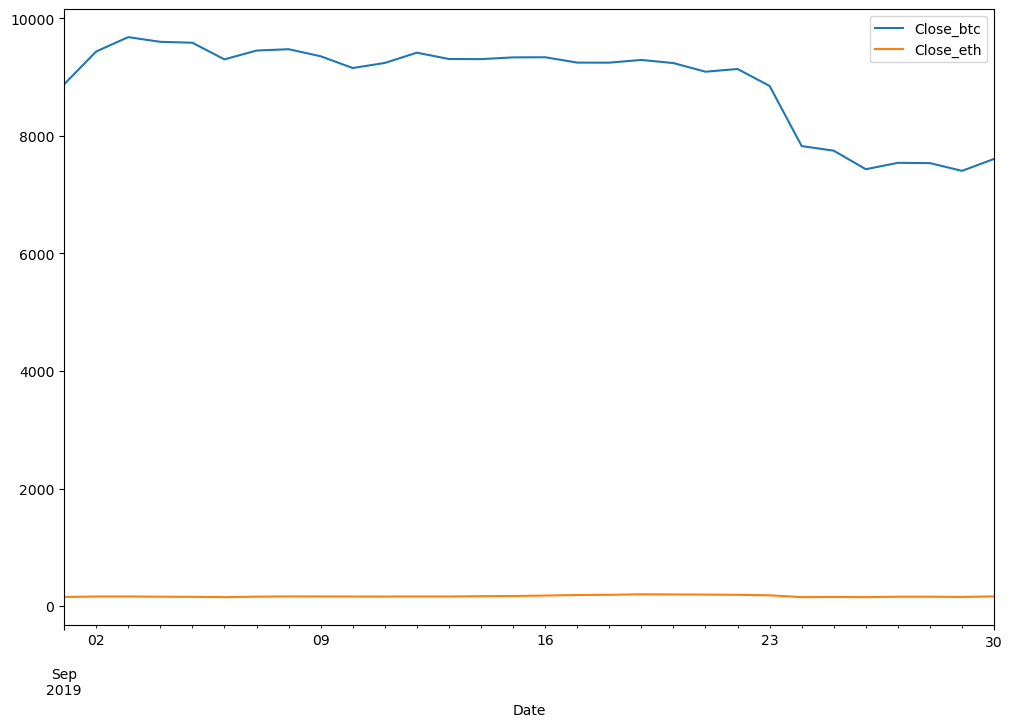

In [26]:
btc_eth.loc['2019-09',['Close_btc', 'Close_eth']].plot(figsize=(12,8))

En visualisant les données avec Matplotlib, nous constatons que les échelles des deux cryptomonnaies sont différentes, rendant la comparaison difficile. Une solution est d'utiliser des sous-graphiques (ou subplots) en spécifiant $subplot=True $ dans notre fonction d'affichage. 

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

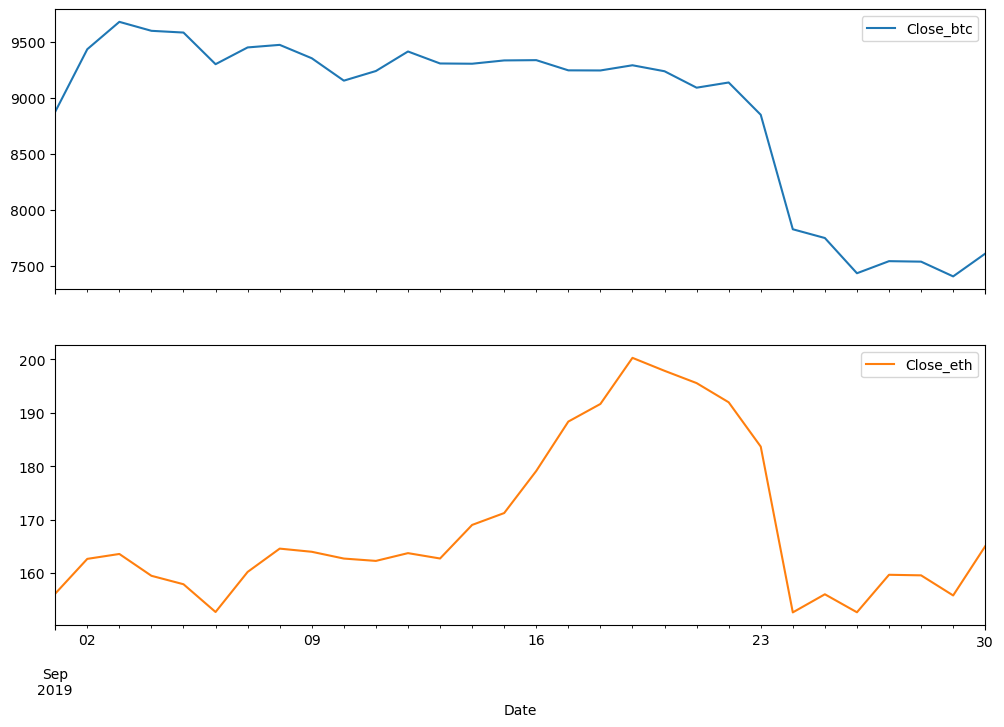

In [27]:
btc_eth.loc['2019-09', ['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12, 8))

## 6. Pandas corr()

Quand on regarde ce graphique, on peut se dire que l'Ethereum et le Bitcoin sont deux cryptomonnaies qui sont très bien corrélées. 

Pour calculer cette corrélation, c'est très simple on va écrire $.corr()$. 

In [28]:
btc_eth[['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.928583
Close_eth,0.928583,1.000000


Et là, on obtient une matrice de corrélation dans pandas. Donc, on peut voir qu'on a une corrélation de 93 %, ce qui est très élevé. Maintenant, si on veut observer ces corrélations, ainsi que d'autres corrélations dans un graphique, on utilisera Seaborn. 

Ça y est, on a fait le tour des fonctions les plus utiles pour travailler sur des time series.

## 7. Exercice : Stratégie de Trading !

Il va s'agir de mettre en place la "stratégie de la tortue", qui est une technique de trading ancienne, afin de décider quand acheter ou vendre du Bitcoin en fonction de la valeur de "close" par rapport au minimum ou au maximum des 28 derniers jours. 
![Python_Pandas_Fig](./images/Python_Pandas_Fig_000037.png)

Pour écrire ce code, ce que vous allez devoir utiliser, ce sont les fonctions $rolling$ qui vont vous permettre de calculer le minimum et le maximum sur les 28 derniers jours. 

Puis, avec du $boolean\ indexing$, lorsque la valeur de "close" est supérieure au maximum des 28 derniers jours, c'est un signe qu'il faut acheter. À l'inverse, lorsqu'elle est inférieure au minimum des 28 derniers jours, c'est un signe qu'il faut vendre nos actions.

En bonus, vous pouvez également utiliser la méthode $shift$, qui vous permet de décaler vos fenêtres d'autant de jours que vous le souhaitez, afin de prendre vos décisions un jour à l'avance. Cependant, ce n'est pas nécessaire pour cet exercice.

Attention, si je vous donne cet exercice, c'est dans un simple but pédagogique et je vous déconseille fortement de faire des investissements en utilisant cette technique, d'autant plus que le Bitcoin est extrêmement volatile. 

On peut facilement observer les variations au jour le jour en utilisant la fonction $diff$, ce qui nous donne le graphique suivant. 

<Axes: xlabel='Date'>

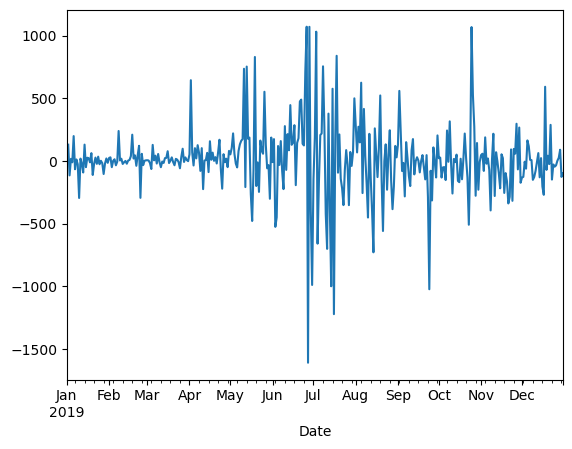

In [29]:
bitcoin.loc['2019']['Close'].diff().plot()

Et là, on observe tout de suite qu'on a des variations extrêmes dans le cours du Bitcoin. Typiquement, si on examine cette région autour des mois de juin et juillet, on trouve des variations si extrêmes qu'elles mettent en péril notre stratégie de trading. 

<Axes: xlabel='Date'>

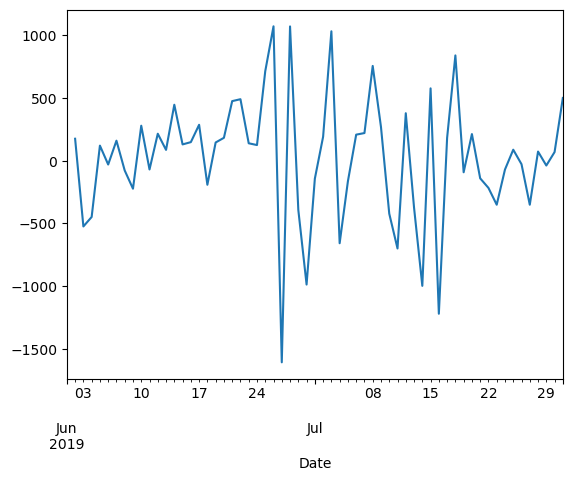

In [30]:
bitcoin.loc['2019-06':'2019-07']['Close'].diff().plot()

On pourrait atteindre ce point et penser que c'est un bon moment pour acheter du Bitcoin parce qu'il est supérieur aux 28 jours qui précèdent. 

Et le lendemain, on perd tout notre argent à cause de la volatilité du Bitcoin. Donc, encore une fois, si je vous donne cet exercice, c'est simplement parce que c'est un bon exercice pratique et amusant. 

Mais surtout, n'utilisez jamais cette méthode en vrai, et surtout pas dans la finance, car c'est réservé aux professionnels.

![Python_Pandas_Fig](./images/Python_Pandas_Fig_000038.png) 
 
Dans cet exercice, il s'agit d'examiner le cours du Bitcoin, ici en bleu, de calculer le minimum et le maximum des 28 derniers jours avec une fonction "rolling". 

Lorsque le cours du Bitcoin dépasse notre bande maximum, comme c'est le cas ici, on prend la décision d'acheter du Bitcoin. 

De la même manière, lorsque le cours du Bitcoin est inférieur au minimum des 28 derniers jours, comme c'est le cas ici, on prend la décision de vendre du Bitcoin. 

Encore une fois, ce n'est pas du tout une bonne stratégie de trading, et je ne vous la conseille surtout pas pour le Bitcoin. En revanche, c'est un bon exercice pour pratiquer les fonctions "rolling".

Pour obtenir ce résultat, on commence par créer une copie de notre DataFrame "Bitcoin". Ainsi, si les choses tournent mal, on a toujours de quoi faire un backup. 

In [31]:
data = bitcoin.copy()

Ensuite, on crée une colonne "buy" et une colonne "sell", et on les initialise avec des zéros. C'est ce qui nous donne cette ligne horizontale que vous voyez ici. 
![Python_Pandas_Fig](./images/Python_Pandas_Fig_000039.png) 


In [32]:
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

Ensuite, on crée une colonne "rolling_max" et une colonne "rolling_min". On utilise la fonction "rolling" avec une fenêtre de 28 jours, et dans cette fenêtre, on cherche à chaque fois le maximum et le minimum de notre signal "close". Mais attention, il est crucial de décaler notre signal d'un jour $.shift(1)$, sinon notre signal bleu resterait toujours entre son minimum et son maximum. Du coup, on n'achèterait jamais de Bitcoin, ni on ne vendrait jamais de Bitcoin, on n'effectuerait aucune action. Il est donc essentiel de décaler toutes nos fenêtres d'un jour vers la droite.

In [33]:
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()

Une fois que ces fenêtres sont créées, on utilise du boolean indexing. 

Cela permet d'écrire la valeur 1 à l'intérieur de la colonne "buy" lorsque le maximum est inférieur à notre signal "close" et d'écrire -1 dans la colonne "sell" lorsque, à l'inverse, le minimum est supérieur à notre signal "close".

In [34]:
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

La cellule suivante permet simplement de créer notre graphique avec Matplotlib. Ici, j'utilise la méthode orientée objet pour partager le même axe X, ce qui me permet de faire des zooms sur les deux graphiques simultanément.

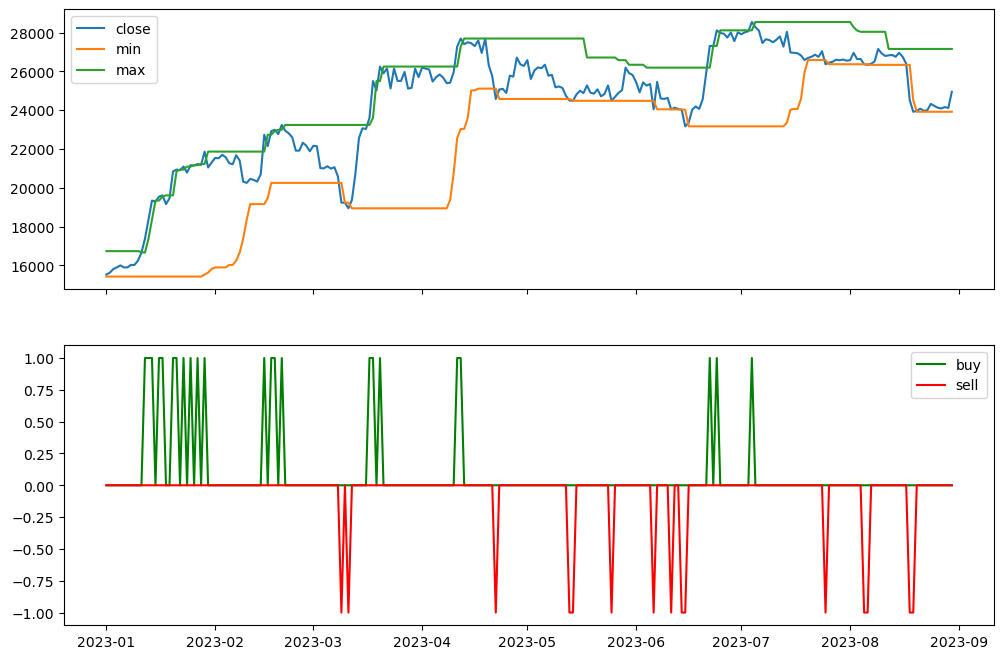

In [35]:
start ='2023'
end='2023'
fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)
#plt.figure(figsize=(12, 8))
#plt.subplot(211)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].legend(['close', 'min', 'max'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['buy', 'sell'])